Decision Tree Metrics:
Accuracy: 0.933, Precision: 0.933, Recall: 0.933, F1-score: 0.933

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



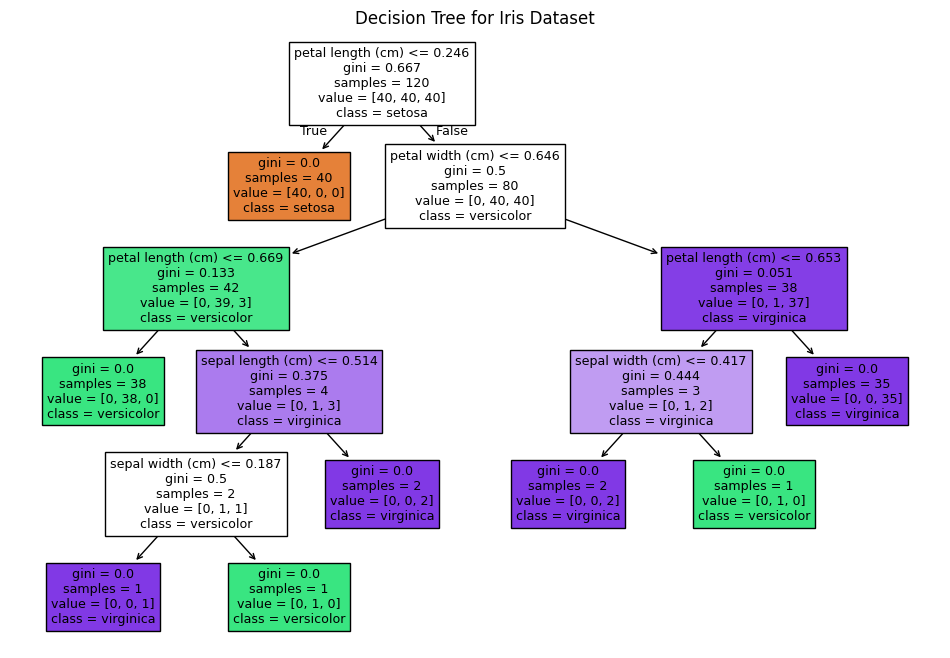

KNN Metrics:
Accuracy: 0.967, Precision: 0.970, Recall: 0.967, F1-score: 0.967

Better classifier: KNN

Top 5 Association Rules by Lift:
   antecedents consequents  antecedent support  consequent support  support  \
11   (diapers)     (juice)            0.366667            0.300000      0.2   
10     (juice)   (diapers)            0.300000            0.366667      0.2   
1      (bread)      (nuts)            0.400000            0.300000      0.2   
2       (nuts)     (bread)            0.300000            0.400000      0.2   
9      (juice)      (coke)            0.300000            0.433333      0.2   

    confidence      lift  representativity  leverage  conviction  \
11    0.545455  1.818182               1.0      0.09        1.54   
10    0.666667  1.818182               1.0      0.09        1.90   
1     0.500000  1.666667               1.0      0.08        1.40   
2     0.666667  1.666667               1.0      0.08        1.80   
9     0.666667  1.538462               1.0      

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [1]:
# mining_iris_basket.ipynb

# -----------------------------
# Section 1: Imports
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules

# -----------------------------
# Section 2: Load and Preprocess Iris Data
# -----------------------------
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Encode species
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Normalize features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

# Split into train/test
X = df_scaled[iris.feature_names].values
y = df_scaled['species_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Part A: Classification
# -----------------------------

# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.3f}, Precision: {precision_dt:.3f}, Recall: {recall_dt:.3f}, F1-score: {f1_dt:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))

# Visualize Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.savefig("decision_tree.png")
plt.show()

# 2. K-Nearest Neighbors (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.3f}, Precision: {precision_knn:.3f}, Recall: {recall_knn:.3f}, F1-score: {f1_knn:.3f}")

# Comparison
better_model = "Decision Tree" if accuracy_dt >= accuracy_knn else "KNN"
print(f"\nBetter classifier: {better_model}")

# -----------------------------
# Part B: Association Rule Mining
# -----------------------------

# Generate synthetic transactional data
np.random.seed(42)
items_pool = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'butter', 'chips',
              'coke', 'apple', 'banana', 'chocolate', 'yogurt', 'coffee', 'tea', 'juice',
              'cereal', 'cookies', 'ham', 'nuts']

num_transactions = 30
transactions = []

for _ in range(num_transactions):
    basket_size = np.random.randint(3, 9)  # 3-8 items per basket
    basket = list(np.random.choice(items_pool, size=basket_size, replace=False))
    transactions.append(basket)

# Convert to one-hot DataFrame
all_items = sorted(items_pool)
oht_df = pd.DataFrame(0, index=np.arange(len(transactions)), columns=all_items)
for i, basket in enumerate(transactions):
    oht_df.loc[i, basket] = 1

# Apply Apriori algorithm
frequent_itemsets = apriori(oht_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values(by='lift', ascending=False)

# Display top 5 rules
print("\nTop 5 Association Rules by Lift:")
print(rules.head(5))

# Example rule analysis
top_rule = rules.iloc[0]
print(f"\nExample Rule Analysis:\nRule: {top_rule['antecedents']} => {top_rule['consequents']}")
print(f"Support: {top_rule['support']:.2f}, Confidence: {top_rule['confidence']:.2f}, Lift: {top_rule['lift']:.2f}")


# Explanation
## Part A: Classification

### 1.Decision Tree

Trained on preprocessed Iris features.

Predicted test labels.

Computed accuracy, precision, recall, F1-score.

Visualized using plot_tree.

### 2.KNN (k=5)

Trained on the same train set.

Metrics computed and compared to Decision Tree.

Better model chosen based on accuracy.

## Part B: Association Rule Mining

### 1.Synthetic Transaction Data

30 transactions, 20 items, baskets of 3-8 items.

Converted to one-hot encoding for Apriori.

### 2.Apriori Algorithm

Minimum support = 0.2

Minimum confidence = 0.5

Sorted by lift, top 5 rules displayed.

### 3.Rule Analysis

Discuss one rule's support, confidence, lift.

Example: if milk and bread are bought together, butter is likely bought too.

Implication: Useful for retail recommendation and cross-selling.